# Excercise 2 - Logistic Regression

In [75]:
import numpy as np
from scipy import linalg

import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [76]:
# Load data from file
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

# Get sample and feature size
m, n = X.shape

# Reshape matrices
X = X.reshape((m, 2))
y = y.reshape((m, 1))

Plot scatterplot of data

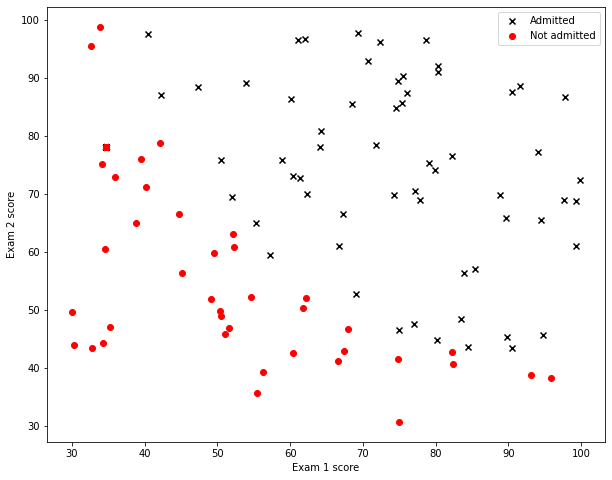

In [77]:
# Find all data points with positive and negative results respectively
pos = np.nonzero(y == 1)
neg = np.nonzero(y == 0)

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[pos, 0], X[pos, 1], marker='x', color='black', label='Admitted')
ax.scatter(X[neg, 0], X[neg, 1], marker='o', color='red', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend()

Compute cost and gradient

In [78]:
def sigmoid(z):
    return 1.0 / ( 1 + np.e ** (-1.0 * z))

# Test function with some values
test = np.array([[0], [1], [-1], [10], [-10]])
sigmoid(test)


array([[5.00000000e-01],
       [7.31058579e-01],
       [2.68941421e-01],
       [9.99954602e-01],
       [4.53978687e-05]])

In [79]:
def cost_function(theta, X, y):
    m, n = X.shape
    grad = np.zeros(theta.size)

    z = X @ theta
    h = sigmoid(z)

    J = (1/m) * sum(-y * np.log(h) - (1-y) * np.log(1-h))

    for i in range(n):
        col = X[:, i].reshape((m, 1))
        grad[i] = (1/m) * np.sum((h-y) * col)

    return J, grad

In [80]:
# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)

print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628
[ -0.1        -12.00921659 -11.26284221]


In [ ]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])

cost, grad = cost_function(test_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.218')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.043\n 2.566\n 2.647')